# Clause 1  (Import Data)

In [89]:
# -*- coding: utf-8 -*-
'''
Created on Wed Jun  2 14:23:41 2021

@author: Lior , Bashar


'''

# The research question: What factors are highly correlated to a satisfied (or dissatisfied) 
# passenger? Can you predict passenger satisfaction?


"""
    Clause 1  (Import Data)
"""
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# read files
test = pd.read_csv("test.csv")  # test csv
train = pd.read_csv("train.csv") # train csv

test_full = test
train_full = train

In [90]:
train_full

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied



# Clause 2+3  (Pre-proccessing , Data description)


In [91]:
"""
    Clause 2+3  (Pre-proccessing , Data description)
"""

# abserve categorical and numerical columns:
categorical_columns = train.dtypes[train.dtypes == 'object'].index
numerical_columns = train.dtypes[train.dtypes != 'object'].index

# change catagarical data into numerical data using label encoding:
label_encoder = LabelEncoder()
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])
    
# Because columns "ID" , "Unnamed: 0" are irrelevant to the research question, we will drop it. 
test = test.drop(['id','Unnamed: 0'], axis=1)
train = train.drop(['id','Unnamed: 0'], axis=1)

# head of data:
print("*** Head: ***")
print(train.head())
print("\n")

*** Head: ***
   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                     

In [92]:
# concise summary of a DataFrame
# we can see that now all the data is numerical
print("*** Info: ***")
print(train.info())
print("\n")

*** Info: ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding          

In [93]:
# Generate descriptive statistics
print("*** Description: *** ")
print(train.describe())
print("\n")

*** Description: *** 
              Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.000000      27.000000        0.000000   
50%         0.000000       0.000000      40.000000        0.000000   
75%         1.000000       0.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       

In [94]:
# check what is the percest of nulls in each column:
print("*** Nulls in data: ***")
print("In train data: ")
print(train.isna().sum())
print("\n In test data: ")
print(test.isna().sum())
# WE CAN SEE THAT THERE ARE NULLS ONLY IN THE COLUMN : ARRIVAL DELAY IN MINUTES
# I am not going to drop null in this level. I will drop or impute null values after the checking correlations.


*** Nulls in data: ***
In train data: 
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

 In 

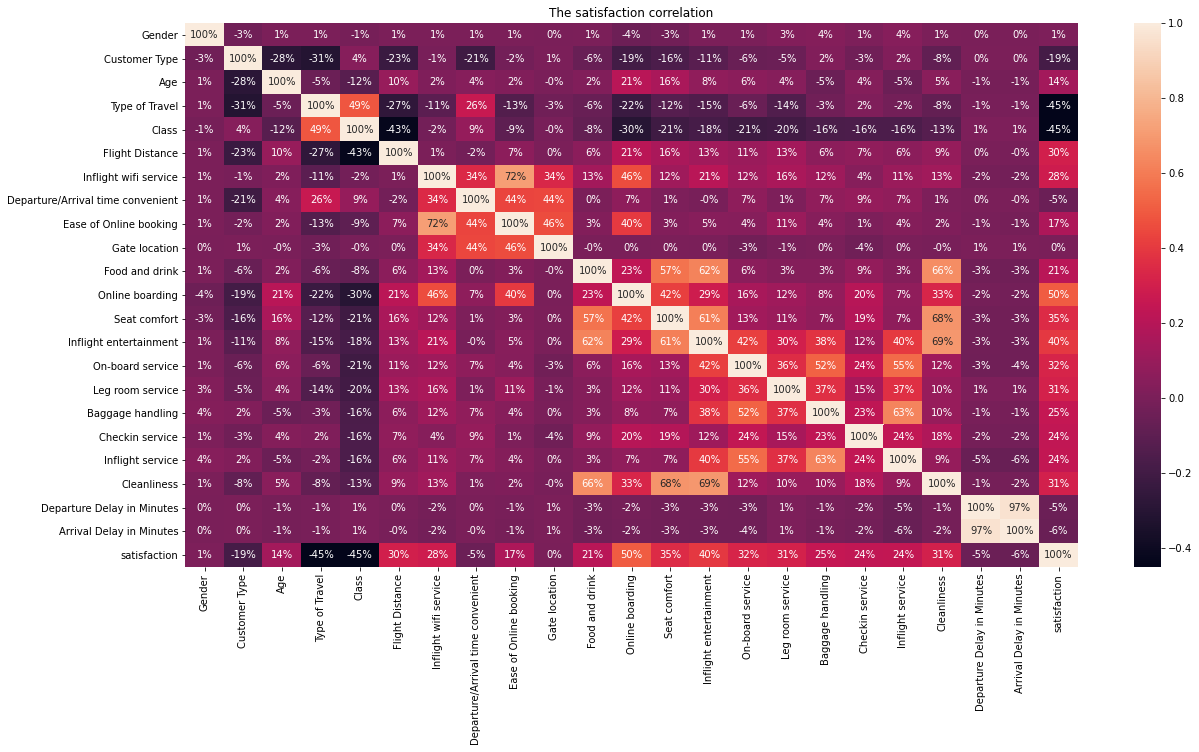

In [95]:
# Correlation matrix - train data
plt.figure(figsize=(20,10))
plt.title('The satisfaction correlation')
sns.heatmap(train.corr(), annot=True, fmt='.0%')

In [96]:
# There are some features not correlated with the satisfaction. (negative values in the correlation matrix)
# So, I am going to drop all of them from the dataset, and keep only positive correlated features
train = train.drop(['Customer Type', 'Type of Travel','Class','Departure/Arrival time convenient', 'Gate location',
                'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)
test = test.drop(['Customer Type', 'Type of Travel','Class','Departure/Arrival time convenient', 'Gate location',
                'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

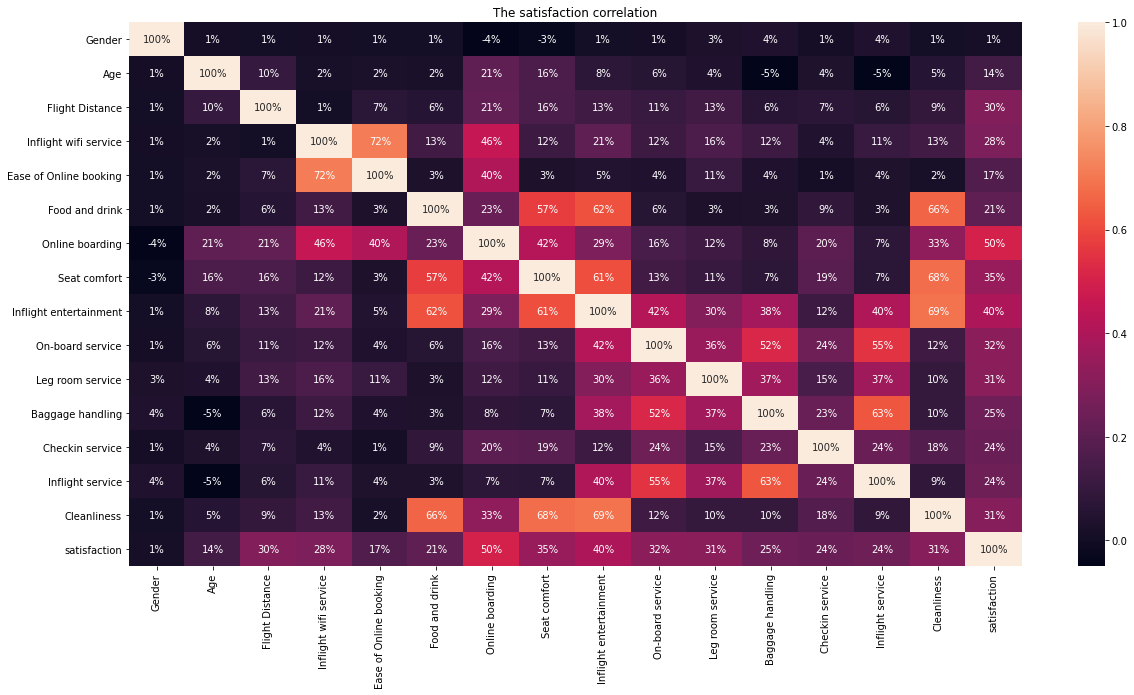

In [97]:
# now we can see that all of the values in the correlation matrix are positive. (all correlated)
# we can see highest correlation between: departure delay in minutes and arrival delay in minutes (97%)
# and in terms of satisfaction the highest correlations are (research question):
    #   online boarding (50%)
    #   inflight intertainment (40%)
    #   seat comfort (35%)
plt.figure(figsize=(20,10))
plt.title('The satisfaction correlation')
sns.heatmap(train.corr(), annot=True, fmt='.0%')

In [98]:
# check amount of rows in dataset
print("\n train data size: ")
print(train.shape)
print("\n test data size: ")
print(test.shape)


 train data size: 
(103904, 16)

 test data size: 
(25976, 16)


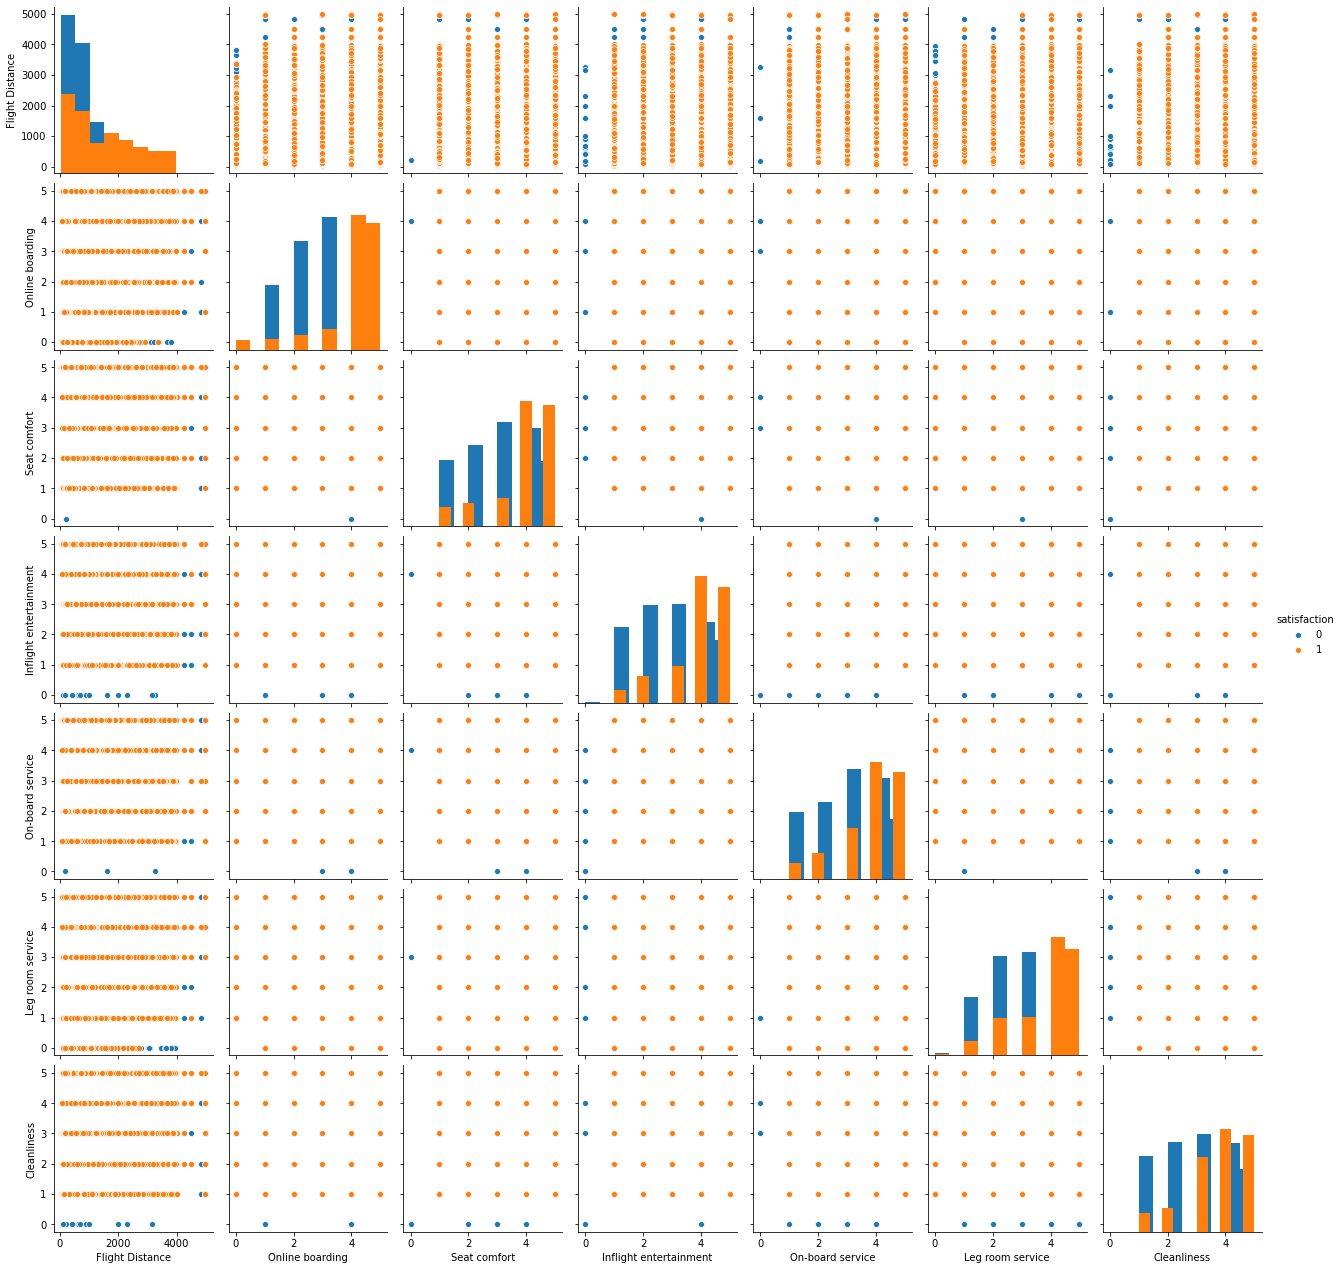

In [99]:
# seaborn.pairplot : Plot pairwise relationships in a dataset.
# Parameters:
    # Hue: helps us to get the difference in variable in data to map plot aspects to different colors.
    # kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}: Kind of plot to make.
    # diag_kind="hist":  force marginal histograms
# Output explanation:
    # The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 
    # it shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.
    # Because there are 8 measurements, it creates a 8x8 plot.
    # we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.
# In order to understand the graph better, and clearer, we took only the features with correlation above 30%:
 
snsplot_columns = train[['Flight Distance','Online boarding','Seat comfort','Inflight entertainment','On-board service',
                        'Leg room service','Cleanliness','satisfaction']]
sns_plot = sns.pairplot(snsplot_columns,hue="satisfaction",diag_kind="hist")

In [100]:
# merged file by pandas.concat in order to pre-proccess and describe the whole data
merged = pd.concat([train, test])

# merged dataset (full dataset) hist
#merged.hist(bins=50, figsize=(20,15))

 # check (again) what is the percest of nulls in each column:
# now, there are no nulls in the train and test data. 
print("\n *** Nulls in data: ***")
print(merged.isna().sum())


 *** Nulls in data: ***
Gender                    0
Age                       0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Leg room service          0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64


###  Clause 4  (What features mostly affect passenger satisfaction, by:
        (1) Clustering algorithms
        (2) Visualisation algorithms
        (3) Building new features or feature transformation )

# (1) Clustering algorithms 

In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# First, before normalizing the data, we need to split it to x and y
x = merged.drop(['satisfaction'], axis = 1)  # all attributes except 'satisfaction'
y = merged['satisfaction'] # 'satisfaction' attribute only


In [102]:
# KMeans
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [103]:
# elbow method to determine the number of clusters in a data set
def elbow_met(df):
    from scipy.spatial.distance import cdist
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    

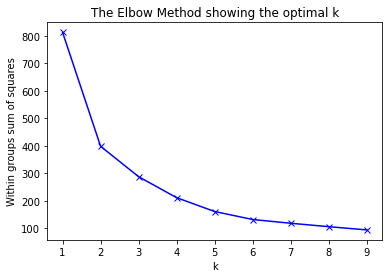

In [104]:
# performing elbow method to get besk K:

df = pd.DataFrame(merged, columns=merged.columns)
elbow_met(df)


In [105]:
# from elbow method we see that the best K for KMeans is 2. 
# therefore, we will perform KMeans for 2 clusters. 

kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(df)

df['Cluster'] = y

# Lets analyze the clusters
df_groupby_cluster = df.groupby(['Cluster']).mean()
df_groupby_cluster.to_csv(r"C:\Users\bonol\Downloads\task3\df_groupby_cluster.csv")
print (df_groupby_cluster)
# From the table below we can see for each cluster (0 or 1) the mean value that belongs to it from each feature.
# Example: for Gender, wifi service the mean as very similar in both clusters.


           Gender        Age  Flight Distance  Inflight wifi service  \
Cluster                                                                
0        0.495220  42.311188      2624.623295               2.735609   
1        0.491662  38.371387       664.710192               2.726162   

         Ease of Online booking  Food and drink  Online boarding  \
Cluster                                                            
0                      2.885791        3.324596         3.701875   
1                      2.709634        3.160864         3.088007   

         Seat comfort  Inflight entertainment  On-board service  \
Cluster                                                           
0            3.777698                3.644627          3.606299   
1            3.318110                3.253069          3.301203   

         Leg room service  Baggage handling  Checkin service  \
Cluster                                                        
0                3.636473          3.7443

In [106]:
# We cannot visualize the clusters because we have more than 3 columns.
# We will do visualization later in Visualization section.
# For now, we performed KMeans for each feature with Satisfation.


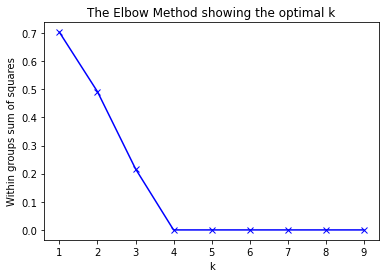

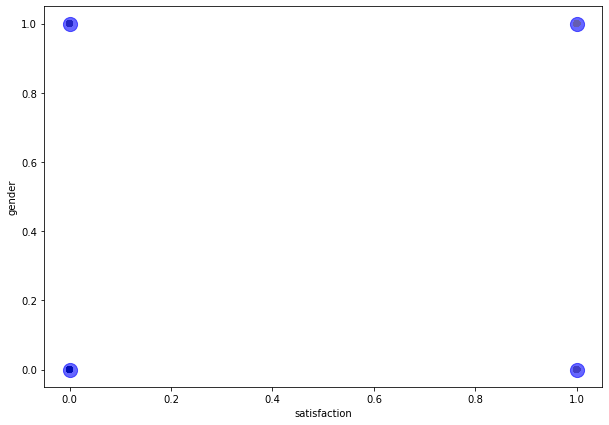

In [107]:
# We want to see what elements influence the most satisfaction.
# we will do this by performing k-means on satisfaction with each of the other attributes.
# The number represents the sum of squared errors of samples to their closest cluster center.
    
satisfaction = merged['satisfaction']
gender = merged['Gender']
Data = {0: satisfaction.tolist(),1:gender.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 4.
n_clusters = 4
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,gender, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('gender') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)


In [108]:
# we can see that like in the correlation matrix, gender attrubute and satisfaction are not correlated 
# In the correlation matrix , the correlation between gender and satisfaction was 1%
# And here, we can see that in both 'satisfied' and 'neutral or dissatisfied' clusters there are people from both genders equally.
# SSE here is zero, meaning: all of the observations are on the regression line

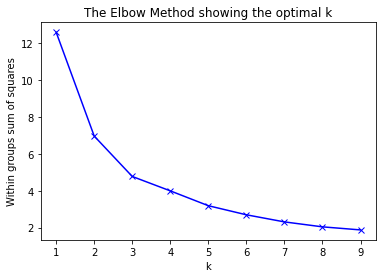

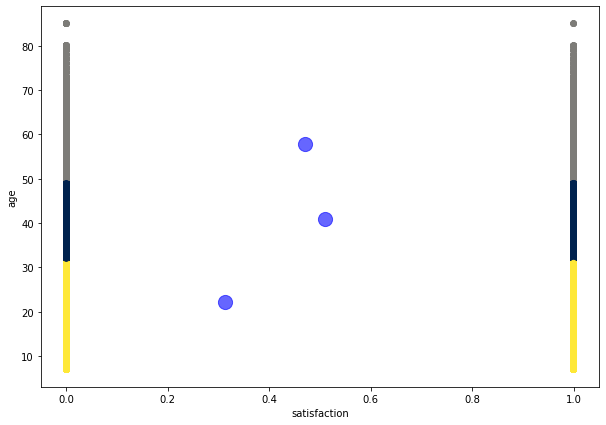

In [109]:
age = merged['Age']
Data = {0: satisfaction.tolist(),1:age.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 3.
n_clusters = 3
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,age, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('age') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)



In [110]:
# we can see that like in the correlation matrix, age attrubute and satisfaction are not correlated 
# In the correlation matrix , the correlation between age and satisfaction was 14%
# And here, we can see that in both 'satisfied' and 'neutral or dissatisfied' clusters there are people from all ages more or less equally.
# It seems from the plot that there are more neutral or dissatisfied than satisfied in all ages.
# SSE here is about 5 

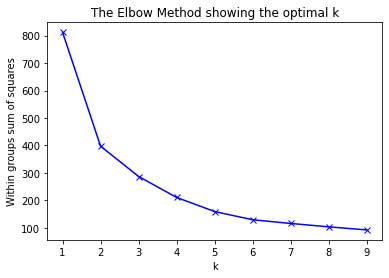

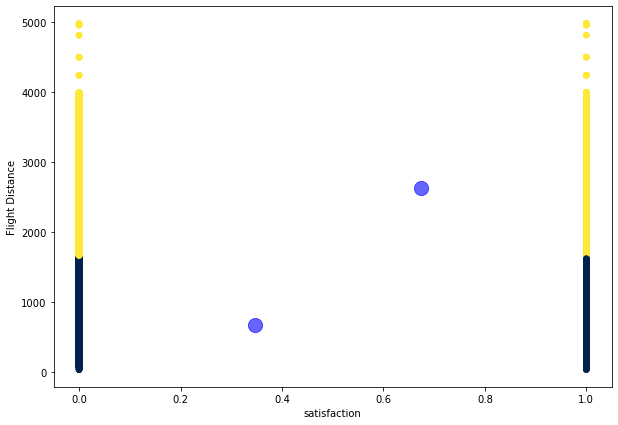

In [111]:
# Flight Distance
flight_distance= merged['Flight Distance']
Data = {0: satisfaction.tolist(),1:flight_distance.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 2.
n_clusters = 2
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,flight_distance, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Flight Distance') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [112]:
# we can see that like in the correlation matrix, Flight Distance attrubute and satisfaction are not so correlated ,
# but yet more correlated than we saw in 'age' and 'gender'.
# In the correlation matrix , the correlation between Flight Distance and satisfaction was 30%
# And here, we can see that in both 'satisfied' and 'neutral or dissatisfied' clusters there are people from all flight Distances more or less equally.
# although, we can see that in the shorter flight distances there is bit more satisfied people. (the upper part of the blue right cluster)
# SSE here is about 400 (very high) 
# a high sum of squares indicates that most of the values are farther away from the mean, and hence, there is large variability in the data.

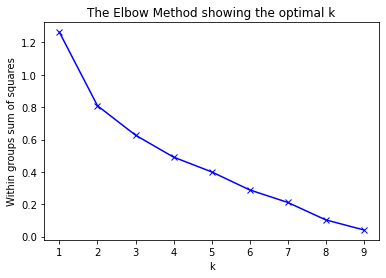

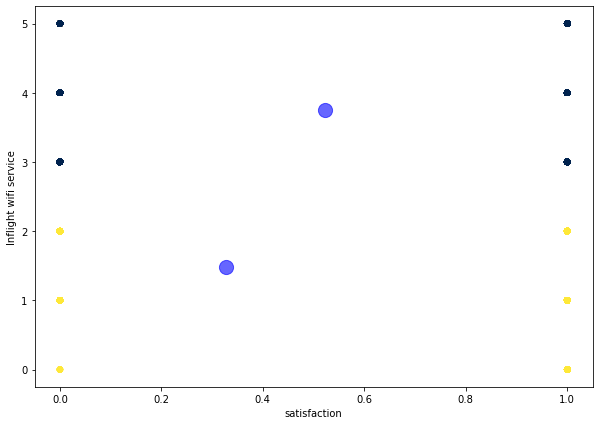

In [113]:

# Inflight wifi service
inflight_wifi_service = merged['Inflight wifi service']
Data = {0: satisfaction.tolist(),1:inflight_wifi_service.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 2.
n_clusters = 2
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,inflight_wifi_service, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Inflight wifi service') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [114]:
# we can see that like in the correlation matrix, Inflight wifi service attrubute and satisfaction are not correlated ,
# In the correlation matrix , the correlation between Inflight wifi and satisfaction was 28%
# Here, we can see that people in feature inflight service= 0-5 are both 'satisfied' and 'neutral or dissatisfied' the same.
# SSE here is about 0.8. A low sum of squares refers to low variability in the set of observations.

Text(0, 0.5, 'Ease of Online booking')

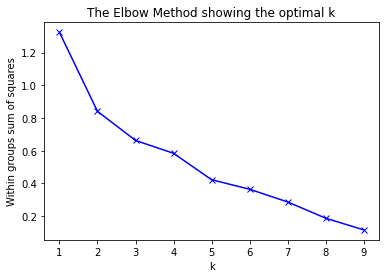

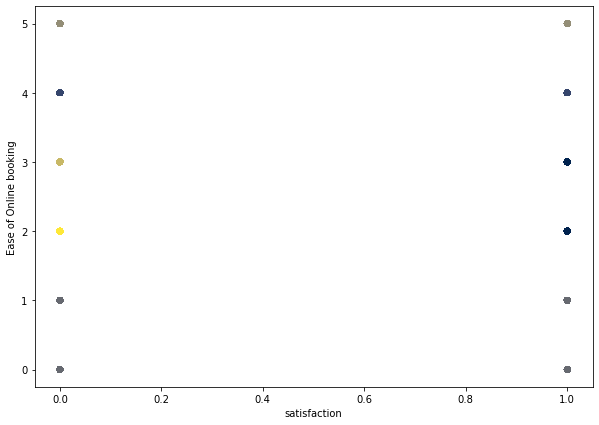

In [115]:
# Ease of Online booking
ease_of_online_booking = merged['Ease of Online booking']
Data = {0: satisfaction.tolist(),1:ease_of_online_booking.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 6.
n_clusters = 6
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,ease_of_online_booking, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Ease of Online booking') #y label
#plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [116]:
# we can see that unlike in the correlation matrix, Ease of Online booking attrubute and satisfaction are a little correlated ,
# In the correlation matrix , the correlation between Ease of Online booking and satisfaction was 17%
# And here, we can see that people in feature "Ease of online booking" = 0-1 are both 'satisfied' and 'neutral or dissatisfied'
# But  people in feature "Ease of online booking" = 2-4 are more satisfied. 
# SSE here is about 0.4 . A low sum of squares refers to low variability in the set of observations.

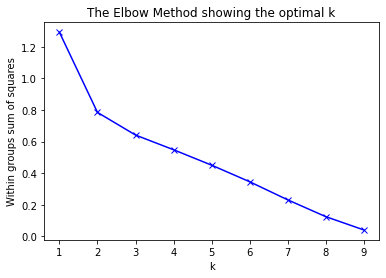

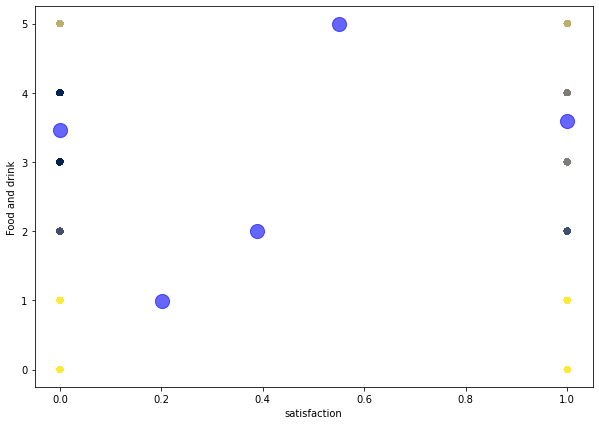

In [117]:
# Food and drink
food_and_drink = merged['Food and drink']
Data = {0: satisfaction.tolist(),1:food_and_drink.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 5.
n_clusters = 5
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,food_and_drink, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Food and drink') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)


In [118]:
# we can see that like in the correlation matrix, Food and drink attrubute and satisfaction seem to be not so correlated ,
# In the correlation matrix , the correlation between Food and drink and satisfaction was 21%
# And here, we can see that people that are in 'food and drink' in range of all values are both satisfied and 'neutral or dissatisfied' equally.
# SSE here is about 0.5. A low sum of squares refers to low variability in the set of observations.

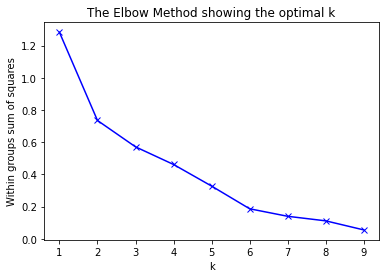

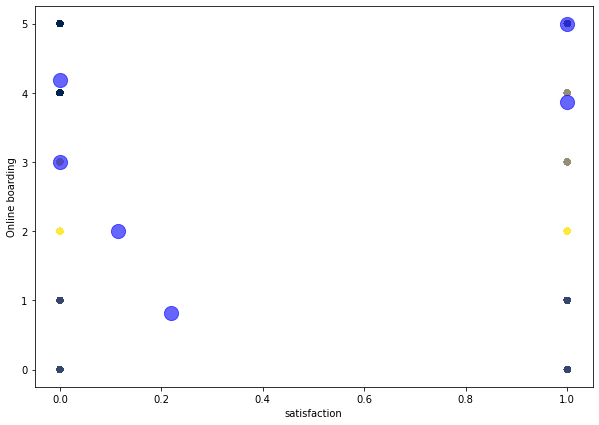

In [119]:
# Online boarding
online_boarding = merged['Online boarding']
Data = {0: satisfaction.tolist(),1:online_boarding.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 6.
n_clusters = 6
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,online_boarding, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Online boarding') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [120]:
# we can see that like in the correlation matrix, Online boarding and satisfaction seem a little correlated ,
# In the correlation matrix , the correlation between Online boarding and satisfaction was 50%
# And here, we can see that people from 'online boaring'=0-1 and 'online boaring'=4-5 are less satisfied (blue cluster) then the people in 'online boaring'=3-5 (brown cluster)
# while people in 'online boaring'=2 (yellow cluster) are both  satisfied and 'neutral or dissatisfied' equally.
# SSE here is about 0.7

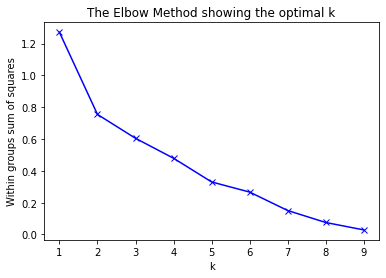

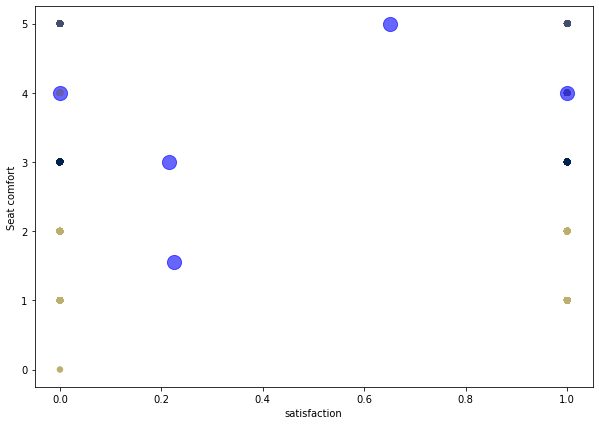

In [121]:
# Seat comfort
seat_comfort = merged['Seat comfort']
Data = {0: satisfaction.tolist(),1:seat_comfort.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 5.
n_clusters = 5
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,seat_comfort, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Seat comfort') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [122]:
# we can see that like in the correlation matrix, Seat comfort and satisfaction seem to be correlated ,
# In the correlation matrix , the correlation between Seat comfort and satisfaction was 35%
# And here, we can see that people from 'seat comfort'<2 are less satisfied (brown cluster), 
# yet, people from 'seat comfort'>=2 seem to be  in both 'satisfied' and 'neutral or dissatisfied'
# SSE here is about 0.2. A low sum of squares refers to low variability in the set of observations.

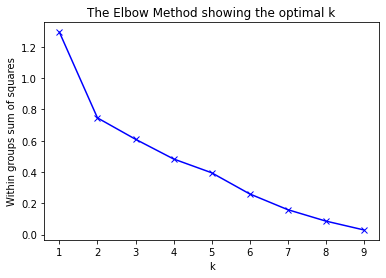

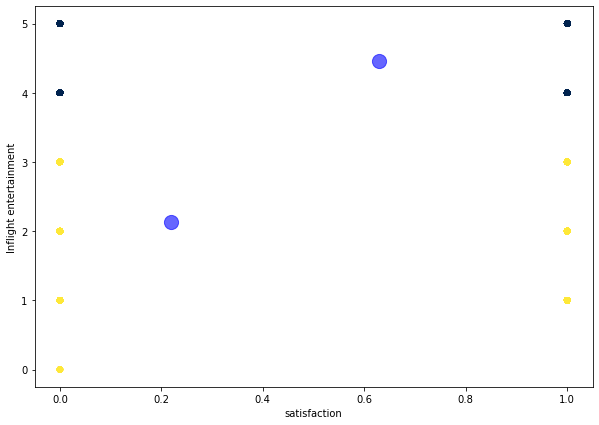

In [123]:
# Inflight entertainment
inflight_entertainment = merged['Inflight entertainment']
Data = {0: satisfaction.tolist(),1:inflight_entertainment.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 2.
n_clusters = 2
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,inflight_entertainment, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Inflight entertainment') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [124]:
# we can see that like in the correlation matrix, Inflight entertainment and satisfaction seem to be correlated ,
# In the correlation matrix , the correlation between Inflight entertainment and satisfaction was 40%
# Here, we can see that in 'inflight entertainment'<=3 people are more likely to be 'neutral or dissatisfied' (yellow cluster)
# SSE here is about 0.7

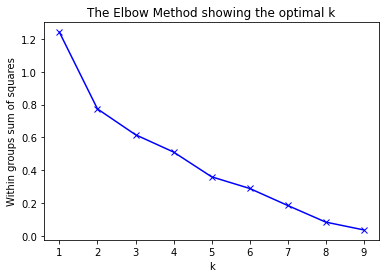

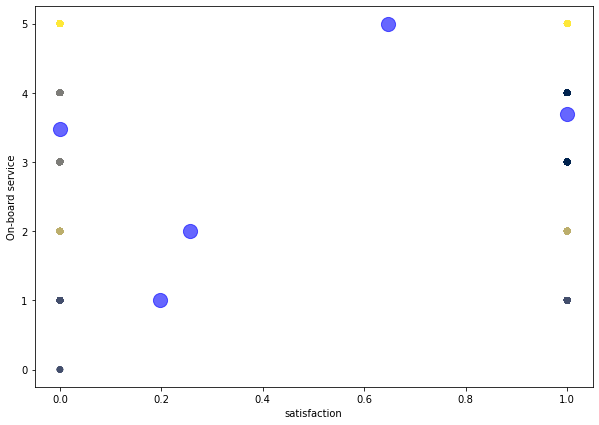

In [125]:
# On-board service
onboard_service = merged['On-board service']
Data = {0: satisfaction.tolist(),1:onboard_service.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 5.
n_clusters = 5
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,onboard_service, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('On-board service') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)


In [126]:
# we can see that unlike in the correlation matrix, On-board service and satisfaction seem not correlated ,
# In the correlation matrix , the correlation between On-board service and satisfaction was 32%
# And here, we can see that most of the unsatisfied people are both in 'on-board service' and not. 
# SSE here is about 0.4. A low sum of squares refers to low variability in the set of observations.

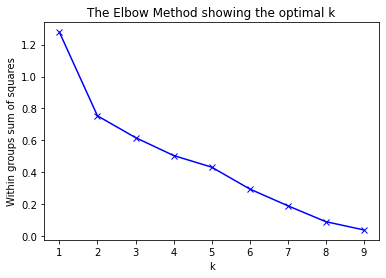

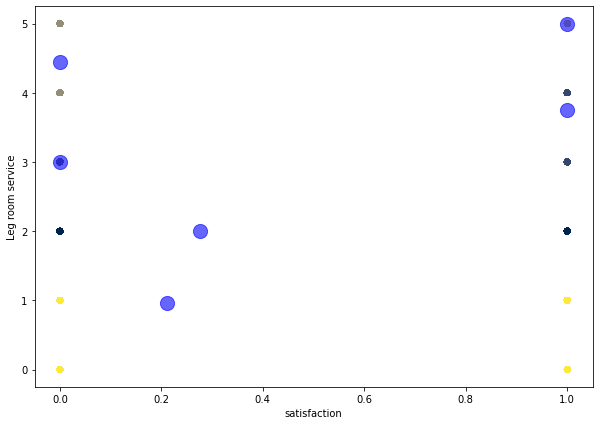

In [127]:
leg_room_service = merged['Leg room service']
Data = {0: satisfaction.tolist(),1:leg_room_service.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 6.
n_clusters = 6
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,leg_room_service, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Leg room service') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)


In [128]:
# we can see that like in the correlation matrix, Leg room service and satisfaction seem a little correlated ,
# In the correlation matrix , the correlation between Leg room service and satisfaction was 31%
# And here, we can see that people in 'leg room service'<=2 are both 'neutral or dissatisfied' and 'satisfied' (yellow and grey clusters)
# Although, people in 'leg room service'>=3 are more 'neutral or dissatisfied' (blue cluster)
# SSE here is about 0.4 . A low sum of squares refers to low variability in the set of observations.

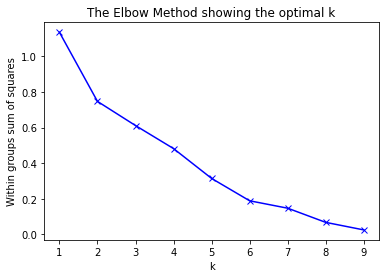

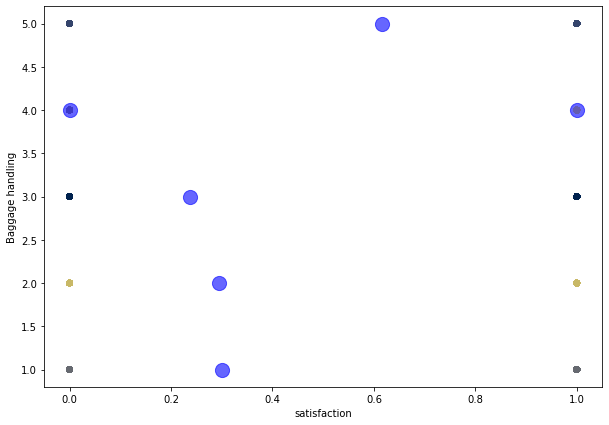

In [129]:
# Baggage handling
baggage_handling = merged['Baggage handling']
Data = {0: satisfaction.tolist(),1:baggage_handling.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 6.
n_clusters = 6
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,baggage_handling, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Baggage handling') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [130]:
# we can see that like in the correlation matrix, Baggage handling and satisfaction seem a little correlated ,
# In the correlation matrix , the correlation between Baggage handling and satisfaction was 25%
# here, we can see that most 'satisfied' people are in 'baggage handerling'<=2 (blue cluster)
# and most 'neutral or dissatisfied' are in 'baggage handerling'=3-4 (grey cluster)
# SSE here is about 0.2.  A low sum of squares refers to low variability in the set of observations.

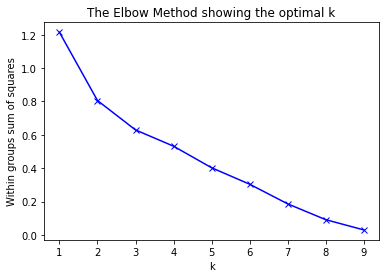

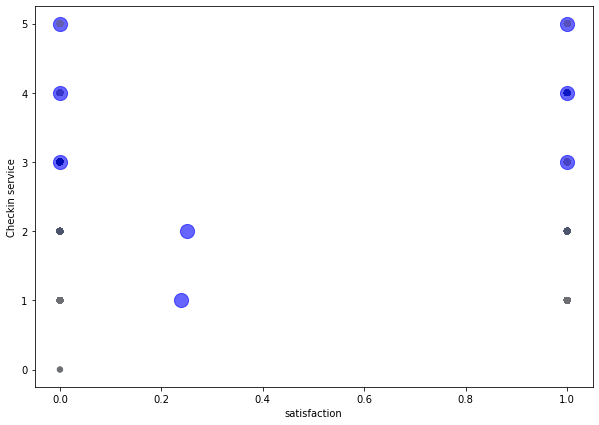

In [131]:
# Checkin service
checkin_service = merged['Checkin service']
Data = {0: satisfaction.tolist(),1:checkin_service.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 8.
n_clusters = 8
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,checkin_service, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Checkin service') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)



In [132]:
# we can see that like in the correlation matrix, Checkin service and satisfaction seem a little correlated ,
# In the correlation matrix , the correlation between Checkin service and satisfaction was 24%
# And here, we can see that people in "checkin service"=0,1,4 are more 'neutral or dissatisfied' (grey cluster)
# people in "checkin service"=2,4,5 are more satisfied (blue cluster)
# SSE here is about 0.1. A low sum of squares refers to low variability in the set of observations.

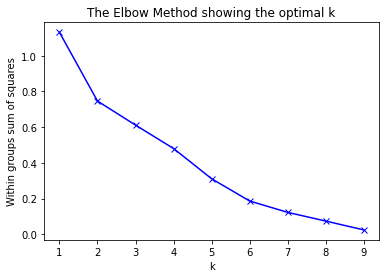

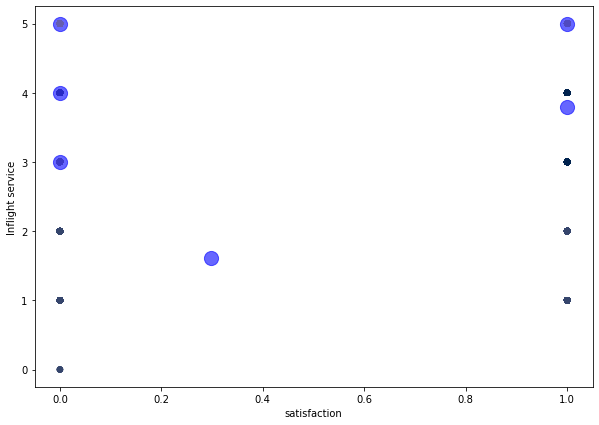

In [133]:

# Inflight service
inflight_service = merged['Inflight service']
Data = {0: satisfaction.tolist(),1:inflight_service.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be 6.
n_clusters = 6
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,inflight_service, c=pred, s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Inflight service') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)


In [134]:
# we can see that like in the correlation matrix, Inflight service and satisfaction seem a little correlated ,
# In the correlation matrix , the correlation between Inflight service and satisfaction was 24%
# Here, we can see that people from 'inflight service'=0,1,2,4 are less satisfied (blue cluster)
# while people from 'inflight service'=3,4,5 are more satisfied (grey cluster)
# SSE here is about 0.2. A low sum of squares refers to low variability in the set of observations.

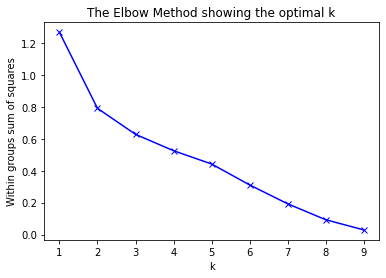

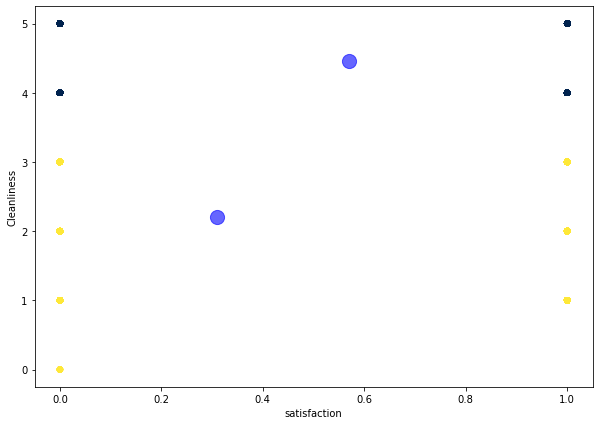

In [135]:
# Cleanliness
cleanliness = merged['Cleanliness']
Data = {0: satisfaction.tolist(),1:cleanliness.tolist()}
df = pd.DataFrame(Data,columns=[0,1])
elbow_met(df) # From the elbow method, we can see that the number of clusters should be2 .
n_clusters =2
a_set = set(df)
kmeans = KMeans(n_clusters)
kmeans.fit(df)
pred = kmeans.predict(df)
plt.figure(figsize=(10,7))
plt.scatter(satisfaction,cleanliness, c= kmeans.labels_.astype(float), s=30, cmap='cividis')
centers = kmeans.cluster_centers_
plt.xlabel('satisfaction') #x label
plt.ylabel('Cleanliness') #y label
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)



In [136]:
# we can see that unlike in the correlation matrix, Cleanliness and satisfaction seem a little correlated ,
# In the correlation matrix , the correlation between Cleanliness and satisfaction was 31%
# And here, we can see that in both 'satisfied' and 'neutral or dissatisfied' clusters there are people from both 'Cleanliness' and not, more or less equally.
# but still we can see that the cluster where people in 'cleanliness'<=3 are a little less satisfied. (yellow cluster)
# SSE here is about 0.8


In [137]:
# In summary, from K-means it seems that the most influensing feateres on satisfaction are: Online boarding, Seat comfort, Inflight entertainment,Cleanliness 
# Similarly to the results of the correlation matrix

        satisfaction  Online boarding
labels                               
0                0.0         3.514798
1                1.0         5.000000
2                0.0         2.000000
3                1.0         4.000000
4                1.0         1.839653
5                0.0         0.895029


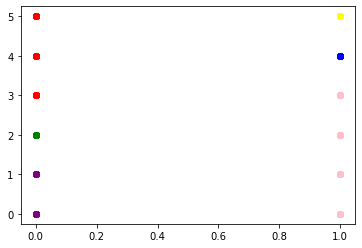

In [138]:
# GMM 
from sklearn.mixture import GaussianMixture

# Let's check our assumption (most influensing feateres on satisfaction are: Online boarding, Seat comfort, Inflight entertainment,Cleanliness)
# with another clustering algorithm : GMM

# online boarding
X = merged[['satisfaction','Online boarding']]
plt.scatter(X['satisfaction'], X['Online boarding']) # plot the data 

gmm = GaussianMixture(n_components = 6)
gmm.fit(X) #Fit the GMM model for the dataset  which expresses the dataset as a mixture of 6 Gaussian Distribution
# Assign a label to each sample
labels = gmm.predict(X) 
X['labels']= labels 
X0 = X[X['labels']== 0] 
X1 = X[X['labels']== 1] 
X2 = X[X['labels']== 2] 
X3 = X[X['labels']== 3] 
X4 = X[X['labels']== 4] 
X5 = X[X['labels']== 5] 
# plot six clusters in same plot 
plt.scatter(X0['satisfaction'], X0['Online boarding'], c ='red') 
plt.scatter(X1['satisfaction'], X1['Online boarding'], c ='yellow') 
plt.scatter(X2['satisfaction'], X2['Online boarding'], c ='green') 
plt.scatter(X3['satisfaction'], X3['Online boarding'], c ='blue') 
plt.scatter(X4['satisfaction'], X4['Online boarding'], c ='pink') 
plt.scatter(X5['satisfaction'], X5['Online boarding'], c ='purple') 

# Lets analyze the clusters
df_groupby_cluster = X.groupby(['labels']).mean()
df_groupby_cluster.to_csv(r"C:\Users\bonol\Downloads\task3\df_groupby_cluster_gmm.csv")
print(df_groupby_cluster)
# From the table below we can see for each cluster (0/1/2/3/4/5) the mean value that belongs to it from each feature.
# Example: we can see that for online boarding mean 3.865 , the satisfaction mean is the highest (1). 


In [139]:
# blue cluster (cluster 3): online boarding mean value is 5 (high), while satisfaction mean value is 0.87 (high)
# purple cluster (cluster 5): online boarding mean value is 4 (high), while satisfaction mean value is 0 (lowest)
# green cluster (cluster 2): online boarding mean value is 3 (medium), while satisfaction mean value is 0 (lowest)
# yellow cluster (cluster 1): online boarding mean value is 3.86 (medium), while satisfaction mean value is 1 (highest)
# pink cluster (cluster 4): online boarding mean value is 2 (low), while satisfaction mean value is 0.11 (low)
# red cluster (cluster 0): online boarding mean value is 0.811 (lowest), while satisfaction mean value is 0.218 (low)
# we can also see that the red cluster is the biggest.

# We can see that in most cases there is a high correlation between online boarding and satisfaction:
# when online boarding is low, satisfaction is also low.
# when online boarding is medium/high , satisfaction is also high - in most cases. 
# these results reinforce our hypothesis and the correlation matrix results at the beggining that showed 50% correlation.

        satisfaction  Seat comfort
labels                            
0           0.223325      1.000000
1           0.609350      3.888315
2           0.000000      3.000000
3           0.651336      5.000000
4           0.226024      2.000000


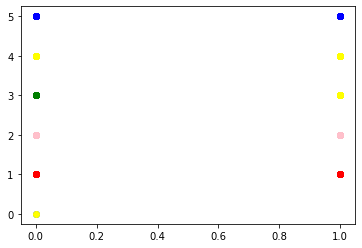

In [140]:
# Seat comfort
X = merged[['satisfaction','Seat comfort']]
plt.scatter(X['satisfaction'], X['Seat comfort']) # plot the data 

gmm = GaussianMixture(n_components = 5)
gmm.fit(X) #Fit the GMM model for the dataset  which expresses the dataset as a mixture of 5 Gaussian Distribution
# Assign a label to each sample
labels = gmm.predict(X) 
X['labels']= labels 
X0 = X[X['labels']== 0] 
X1 = X[X['labels']== 1] 
X2 = X[X['labels']== 2] 
X3 = X[X['labels']== 3] 
X4 = X[X['labels']== 4] 

# plot six clusters in same plot 
plt.scatter(X0['satisfaction'], X0['Seat comfort'], c ='red') 
plt.scatter(X1['satisfaction'], X1['Seat comfort'], c ='yellow') 
plt.scatter(X2['satisfaction'], X2['Seat comfort'], c ='green') 
plt.scatter(X3['satisfaction'], X3['Seat comfort'], c ='blue') 
plt.scatter(X4['satisfaction'], X4['Seat comfort'], c ='pink') 

# Lets analyze the clusters
df_groupby_cluster = X.groupby(['labels']).mean()
df_groupby_cluster.to_csv(r"C:\Users\bonol\Downloads\task3\df_groupby_cluster_gmm.csv")
print(df_groupby_cluster)
# From the table below we can see for each cluster (0/1/2/3/4) the mean value that belongs to it from each feature.
# Example: we can see that for Seat comfort mean 3.81 , the satisfaction mean is the highest (1). 


In [141]:
# red cluster (cluster 0): seat comfort mean value is 3.81 (high), while satisfaction mean value is 1 (highest)
# yellow cluster (cluster 1): seat comfort mean value is 1 (lowest), while satisfaction mean value is 0.22 (low)
# green cluster (cluster 2): seat comfort mean value is 3.4 (medium), while satisfaction mean value is 0 (lowest)
# we can also see that the green cluster is the biggest
# blue cluster (cluster 3): seat comfort mean value is 2 (low), while satisfaction mean value is 0.22 (low)
# pink cluster (cluster 4): seat comfort mean value is 5 (highest), while satisfaction mean value is 0.65 (high)

# We can see that in all cases there is a strong correlation between seat comfort and satisfaction:
# when seat comfort is high, satisfation is also high in all cases.
# when seat comfort is low/medium, satisfaction is also low in all cases.
# these results reinforce our hypothesis and the correlation matrix results at the beggining that showed 35% correlation.

        satisfaction  Inflight entertainment
labels                                      
0           0.218068                2.132797
1           0.629355                4.461608


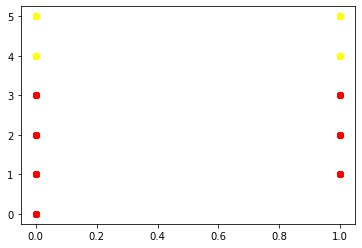

In [142]:
# Inflight entertainment
X = merged[['satisfaction','Inflight entertainment']]
plt.scatter(X['satisfaction'], X['Inflight entertainment']) # plot the data 

gmm = GaussianMixture(n_components = 2)
gmm.fit(X) #Fit the GMM model for the dataset  which expresses the dataset as a mixture of 2 Gaussian Distribution
# Assign a label to each sample
labels = gmm.predict(X) 
X['labels']= labels 
X0 = X[X['labels']== 0] 
X1 = X[X['labels']== 1] 

# plot six clusters in same plot 
plt.scatter(X0['satisfaction'], X0['Inflight entertainment'], c ='red') 
plt.scatter(X1['satisfaction'], X1['Inflight entertainment'], c ='yellow') 

# Lets analyze the clusters
df_groupby_cluster = X.groupby(['labels']).mean()
df_groupby_cluster.to_csv(r"C:\Users\bonol\Downloads\task3\df_groupby_cluster_gmm.csv")
print(df_groupby_cluster)
# From the table below we can see for each cluster (0/1) the mean value that belongs to it from each feature.
# Example: we can see that for inflight entertainment mean value 4.46 , the satisfaction mean is the highest (0.62). 


In [143]:
# yellow cluster (cluster 1): inflight entertainment mean value is 2.13 (low), while satisfaction mean value is 0.21 (low)
# red cluster (cluster 0): inflight entertainment mean value is 4.46 (high), while satisfaction mean value is 0.62 (high)
# we can also see that the red cluster is the biggest.

# We can see that in all cases there is a strong correlation between inflight entertainment and satisfaction:
# when inflight entertainment is high, satisfation is also high in all cases.
# when inflight entertainment is low, satisfaction is also low in all cases.
# these results reinforce our hypothesis and the correlation matrix results at the beggining that showed 40% correlation.

In [ ]:
# Cleanliness
X = merged[['satisfaction','Cleanliness']]
plt.scatter(X['satisfaction'], X['Cleanliness']) # plot the data 

gmm = GaussianMixture(n_components = 2)
gmm.fit(X) #Fit the GMM model for the dataset  which expresses the dataset as a mixture of 2 Gaussian Distribution
# Assign a label to each sample
labels = gmm.predict(X) 
X['labels']= labels 
X0 = X[X['labels']== 0] 
X1 = X[X['labels']== 1] 

# plot six clusters in same plot 
plt.scatter(X0['satisfaction'], X0['Cleanliness'], c ='red') 
plt.scatter(X1['satisfaction'], X1['Cleanliness'], c ='yellow') 

# Lets analyze the clusters
df_groupby_cluster = X.groupby(['labels']).mean()
#df_groupby_cluster.to_csv(r"C:\Users\bonol\Downloads\task3\df_groupby_cluster_gmm.csv")
print(df_groupby_cluster)
# From the table below we can see for each cluster (0/1) the mean value that belongs to it from each feature.
# Example: we can see that for Cleanliness mean value 3.74 , the satisfaction mean is the highest (1). 

In [145]:
# yellow cluster (cluster 1): Cleanliness mean value is 3.74 (high), while satisfaction mean value is 1 (high)
# red cluster (cluster 0):  Cleanliness mean value is 2.93 (low), while satisfaction mean value is 0 (lo)
# we can also see that the red cluster is the biggest.

# We can see that in all cases there is a strong correlation between Cleanliness and satisfaction:
# when Cleanliness is high, satisfation is also high in all cases.
# when Cleanliness is low, satisfaction is also low in all cases.
# these results reinforce our hypothesis and the correlation matrix results at the beggining that showed 31% correlation.

# In summary, we can see that similarily to correlation matrix and our asumption, the most influencing features to satisfaction are:
#   online boarding 
#   inflight intertainment 
#   seat comfort 
#   cleanliness


          Gender        Age  Flight Distance  Inflight wifi service  \
labels                                                                
0       0.491662  38.371387       664.710192               2.726162   
1       0.495220  42.311188      2624.623295               2.735609   

        Ease of Online booking  Food and drink  Online boarding  Seat comfort  \
labels                                                                          
0                     2.709634        3.160864         3.088007      3.318110   
1                     2.885791        3.324596         3.701875      3.777698   

        Inflight entertainment  On-board service  Leg room service  \
labels                                                               
0                     3.253069          3.301203          3.246220   
1                     3.644627          3.606299          3.636473   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
labels                           

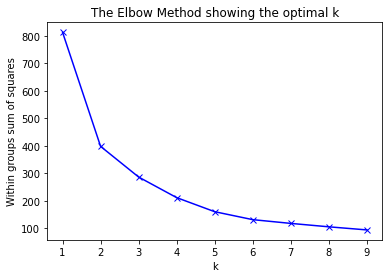

In [146]:
# And in general, this is the analysis table of the whole data
elbow_met(merged) # From the elbow method, we can see that the number of clusters should be 2

X = merged
gmm = GaussianMixture(n_components = 2)
gmm.fit(X) #Fit the GMM model for the dataset  which expresses the dataset as a mixture of 2 Gaussian Distribution
# Assign a label to each sample
labels = gmm.predict(X) 
X['labels']= labels 
X0 = X[X['labels']== 0] 
X1 = X[X['labels']== 1] 

# Lets analyze the clusters
df_groupby_cluster = X.groupby(['labels']).mean()
df_groupby_cluster.to_csv(r"C:\Users\bonol\Downloads\task3\df_groupby_cluster_gmm.csv")
print(df_groupby_cluster)


#  (2) Visualisation algorithms



In [147]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [148]:
'''
2D PCA Scatter Plot using plotly.express 
'''
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
# This code projects the original data which is 15 dimensional into 2 dimensions. 
# There usually isn’t a particular meaning assigned to each principal component. 
# The new components are just the two main dimensions of variation.


x = merged.drop(['satisfaction'], axis = 1) # Separating out the features
y = merged[['satisfaction']]

X = merged[['Gender','Age','Flight Distance','Inflight wifi service','Ease of Online booking','Food and drink',
            'Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service',
            'Baggage handling','Checkin service','Inflight service','Cleanliness']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=merged['satisfaction'])
fig.show()



In [ ]:
# It is iteresting to see, what the plot whould look if we take only the attributes :
#'online boarding', 'inflight intertainment', 'seat comfort' (apparently the most influencing featueres on satisfaction)


x = merged.drop(['satisfaction'], axis = 1) # Separating out the features
y = merged[['satisfaction']]

X = merged[['Online boarding','Seat comfort','Inflight entertainment']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=merged['satisfaction'])
fig.show()


In [ ]:
# as apposed to the first PCA plot, here we can see clearer clusters. (blue cluster- mostly in the right, yellow cluster- mostly in the left)
# It may indicate that indeed there is a correlation between these features and satisfaction.

!pip install SimpSOM

In [ ]:
'''
2D Scatter Plot using  SimpSOM 
'''
#Import the library
import SimpSOM as sps

train = merged.to_numpy()
#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(20, 20, train, PBC=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.01, 10000)

#Save the weights to file
net.save('filename_weights')

#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=-1)
net.diff_graph()

In [ ]:
'''
Significance Graph using POPSOM
'''

# It is interesting to see the significance SOM plot in order to compare significance of different features
# here we will take a look at the 3 most influensing features (by our hypothesis)
# 'online boarding', 'inflight intertainment', 'seat comfort', 'Cleanliness'
# with comparison to some arbitrary features:
#(Because the plot looked unclear and messy when containing all of the features together, we did the comparison between above features and some other arbitrary features)

import popsom as som 

# rename column names for better readability in the graph   
merged = merged.rename(columns={'Flight Distance':'FD',
'Inflight wifi service':'IWS',
'Ease of Online booking':'EOB',
'Food and drink':'FAD',
'Online boarding':'OB',
'Seat comfort':'SC',
'Inflight entertainment':'IE',
'On-board service':'OBS',
'Leg room service':'LRS',
'Baggage handling':'BH',
'Checkin service':'CS',
'Inflight service':'IS',
'Cleanliness':'CLE',
'satisfaction':'SA'})

# With comparison to "Inflight service" (24% in correlation matrix)
labels 	= merged['SA'] 
data 	= merged[['IS','OB','IE','SC','CLE']] 
data.columns =  data.columns
m = som.map(xdim=40,ydim=20,train=3000,norm=False)
m.fit(data,labels)
m.significance()


In [154]:
# We can clearly see that 'Inflight service' is less significant then the 3 other features. 

In [ ]:
# With comparison to "Checkin service" (24% in correlation matrix)
labels 	= merged['SA'] 
data 	= merged[['CS','OB','IE','SC','CLE']] 
data.columns =  data.columns
m = som.map(xdim=40,ydim=20,train=3000,norm=False)
m.fit(data,labels)
m.significance()


In [156]:
# We can clearly see that 'Checkin service' is less significant then the 3 other features.
# Let's see some more.. 

In [ ]:
# With comparison to "Baggage handling" (25% in correlation matrix)
labels 	= merged['SA'] 
data 	= merged[['BH','OB','IE','SC','CLE']] 
data.columns =  data.columns
m = som.map(xdim=40,ydim=20,train=3000,norm=False)
m.fit(data,labels)
m.significance()


In [ ]:
# With comparison to "Gender" (1% in correlation matrix)
labels 	= merged['SA'] 
data 	= merged[['Gender','OB','IE','SC','CLE']] 
data.columns =  data.columns
m = som.map(xdim=40,ydim=20,train=3000,norm=False)
m.fit(data,labels)
m.significance()



In [159]:
# We can see the differences in the significance between the different features
# (mostly here with 'Gender' that has 1% correlation with 'satisfaction')
# and once again, it seems that the most significant and influenscing featers are: 'online boarding', 'inflight intertainment', 'seat comfort'

In [ ]:

'''
2D Scatter Plot using  sklearn T-SNE
'''

## set n_iter sufficiently high to resolve the well stabilized cluster
# get embeddings
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(merged)

In [161]:
# append the x and y components identified by t-SNE to original dataset (merged)
merged["x_component"]=tsne_em[:,0]
merged["y_component"]=tsne_em[:,1]

In [ ]:
import plotly.express as px

# Hover to see Online boarding value
fig = px.scatter(merged, x="x_component", y="y_component", color = "SA", size_max=60, hover_name="OB")
fig.update_layout(height=800)
fig.show()

In [ ]:
# Hover to see Online Inflight entertainment
fig = px.scatter(merged, x="x_component", y="y_component", color = "SA", size_max=60, hover_name="IE")
fig.update_layout(height=800)
fig.show()


In [ ]:
# Hover to see Seat comfort value
fig = px.scatter(merged, x="x_component", y="y_component", color = "SA", size_max=60, hover_name="SC")
fig.update_layout(height=800)
fig.show()

In [ ]:
# Let's try the same - now only on the columns: 'Online boarding','Inflight entertainment','Seat comfort':
# We expect to see clearer clusters, since they seem to be the most significant columns
most_significant = merged[['SA','OB','IE','SC']]
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(most_significant)

In [166]:
# append the x and y components identified by t-SNE to dataset (most_significant)
most_significant["x_component"]=tsne_em[:,0]
most_significant["y_component"]=tsne_em[:,1]

In [ ]:
# Hover to see satisfaction value
fig = px.scatter(most_significant, x="x_component", y="y_component", color = "SA", size_max=60, hover_name="SA")
fig.update_layout(height=800)
fig.show()

# we can see that when we take only the most significant features, we get a plot with at least 6 clear clusters - 
# in contrast to the former plot that wasn't so clear. 

#  (3) Creating new Features

****
    
    In this scection we create a new Dummy Variables as our new features for 4 existed features:
        - Gender
        - Customer Type
        - Type of Travel
        - Class
        
    And as a result new 9 features was created:
        - Gender_Male
        - Gender_Female
        - Customer Type_disloyal Customer
        - Customer Type_Loyal Customer
        - Type of Travel_Personal Travel
        - Type of Travel_Business travel
        - Class_Eco
        - Class_Eco Plus
        - Class_Business
       
    Then we calculated the feature importances before and after adding the new features, and we can see that for some new features were with high importance and some of them are with low one

****

In [168]:
def process_data_(df):
    # Drop unnecessary columns
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('id', axis=1)
    
    # Replace Strings with Numbers
    df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True) 
    df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)
    df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)
    df['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True) 
    df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    
    # Fill missing data with median
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

In [169]:
def dummies(df):
    df=pd.get_dummies(df,columns=["Gender"])
    df=pd.get_dummies(df,columns=["Customer Type"])
    df=pd.get_dummies(df,columns=["Type of Travel"])
    df=pd.get_dummies(df,columns=["Class"])
    return df

def process_data_with_new_features(df):
    # Drop unnecessary columns
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('id', axis=1)
    df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    # Fill missing data with median
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    return df

def change_satisfaction_place(df):
    mid = df['satisfaction']
    df.drop(labels=['satisfaction'], axis=1,inplace = True)
    df.insert(27, 'satisfaction', mid)
    return df

In [170]:
# read files
test_full = pd.read_csv("test.csv")  # test csv
train_full = pd.read_csv("train.csv") # train csv

test_full_with_new_features = dummies(test_full)
train_full_with_new_features = dummies(train_full)

test_full_with_new_features = process_data_with_new_features(test_full_with_new_features)
train_full_with_new_features = process_data_with_new_features(train_full_with_new_features)

test_full = process_data_(test_full)
train_full = process_data_(train_full)

In [171]:
train_full_with_new_features = change_satisfaction_place(train_full_with_new_features)
test_full_with_new_features = change_satisfaction_place(test_full_with_new_features)

Feature: 0, Score: 0.00181
Feature: 1, Score: 0.04041
Feature: 2, Score: 0.02196
Feature: 3, Score: 0.14675
Feature: 4, Score: 0.02200
Feature: 5, Score: 0.02348
Feature: 6, Score: 0.17852
Feature: 7, Score: 0.00564
Feature: 8, Score: 0.00383
Feature: 9, Score: 0.02179
Feature: 10, Score: 0.00403
Feature: 11, Score: 0.36213
Feature: 12, Score: 0.01551
Feature: 13, Score: 0.04704
Feature: 14, Score: 0.00881
Feature: 15, Score: 0.01227
Feature: 16, Score: 0.01475
Feature: 17, Score: 0.02784
Feature: 18, Score: 0.01565
Feature: 19, Score: 0.00902
Feature: 20, Score: 0.00727
Feature: 21, Score: 0.00950


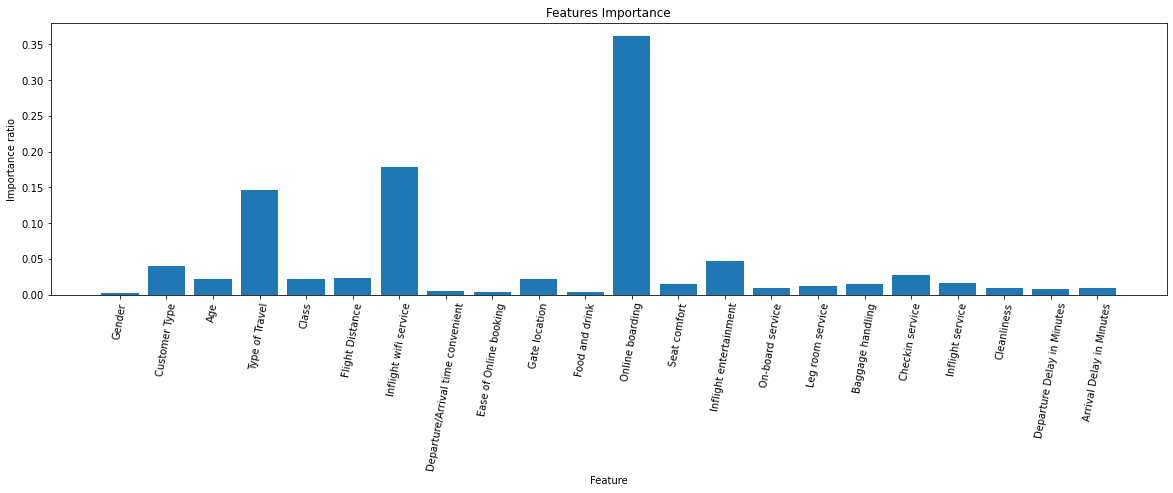

In [172]:
test_full_np_arr_4 = test_full.to_numpy()

# split into input (X) and output (y) variables
x_test_full_4 = test_full_np_arr_4[:,0:22]
y_test_full_4 = test_full_np_arr_4[:,22]

train_full_np_arr_4 = train_full.to_numpy()

x_train_full_4 = train_full_np_arr_4[:,0:22]
y_train_full_4 = train_full_np_arr_4[:,22]


from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot


regressor = DecisionTreeRegressor()
regressor.fit(x_train_full_4, y_train_full_4)

y_pred_dt_c_4 = regressor.predict(x_test_full_4)

importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(20, 5))
pyplot.title("Features Importance")
pyplot.ylabel("Importance ratio")
pyplot.xlabel("Feature")
pyplot.xticks([x for x in range(len(importance))], test_full.columns, rotation=80)
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

Feature: 0, Score: 0.02175
Feature: 1, Score: 0.02315
Feature: 2, Score: 0.17834
Feature: 3, Score: 0.00534
Feature: 4, Score: 0.00359
Feature: 5, Score: 0.02243
Feature: 6, Score: 0.00453
Feature: 7, Score: 0.36187
Feature: 8, Score: 0.01556
Feature: 9, Score: 0.04699
Feature: 10, Score: 0.00889
Feature: 11, Score: 0.01206
Feature: 12, Score: 0.01449
Feature: 13, Score: 0.02789
Feature: 14, Score: 0.01568
Feature: 15, Score: 0.00885
Feature: 16, Score: 0.00676
Feature: 17, Score: 0.00946
Feature: 18, Score: 0.00131
Feature: 19, Score: 0.00126
Feature: 20, Score: 0.01594
Feature: 21, Score: 0.02462
Feature: 22, Score: 0.01234
Feature: 23, Score: 0.13449
Feature: 24, Score: 0.02083
Feature: 25, Score: 0.00088
Feature: 26, Score: 0.00070


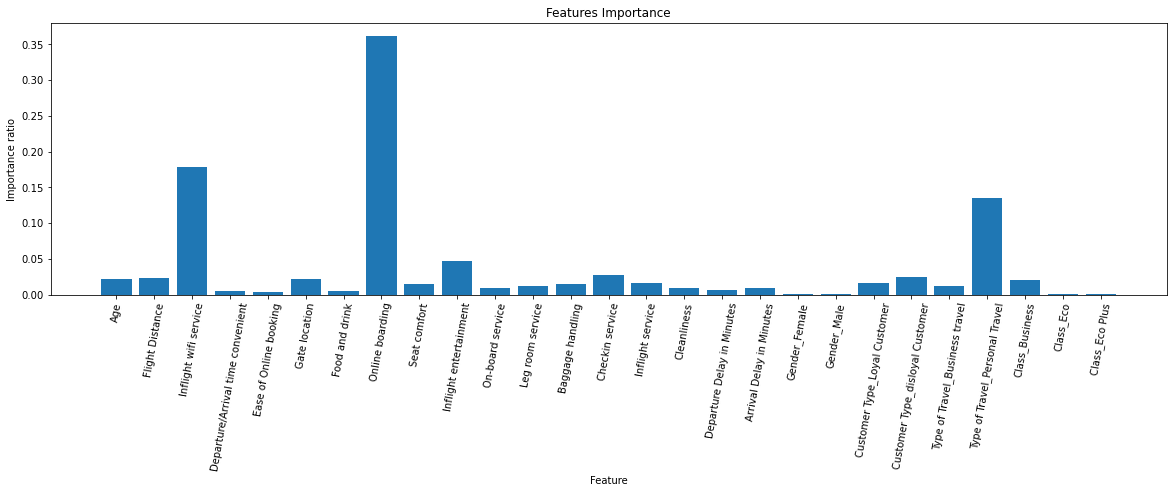

In [173]:
test_full_np_arr_4_with_features = test_full_with_new_features.to_numpy()

# split into input (X) and output (y) variables
x_test_full_4_with_features = test_full_np_arr_4_with_features[:,0:27]
y_test_full_4_with_features = test_full_np_arr_4_with_features[:,27]

train_full_np_arr_4_with_features = train_full_with_new_features.to_numpy()

x_train_full_4_with_features = train_full_np_arr_4_with_features[:,0:27]
y_train_full_4_with_features = train_full_np_arr_4_with_features[:,27]


from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot


regressor = DecisionTreeRegressor()
regressor.fit(x_train_full_4_with_features, y_train_full_4_with_features)

y_pred_dt_c_4_with_features = regressor.predict(x_test_full_4_with_features)

importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(20, 5))
pyplot.title("Features Importance")
pyplot.ylabel("Importance ratio")
pyplot.xlabel("Feature")
pyplot.xticks([x for x in range(len(importance))], test_full_with_new_features.columns, rotation=80)
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

# Clause 5  (Classification)

### Data Pre Proccessing 
#### - cleanning unwanted data
#### - filling empty cells
#### - transforming string data to numeric
#### - converting containers from dataframes to numpy arrays)
#### - spliting arrays to labels and train data

In [174]:
# read files
test_full = pd.read_csv("test.csv")  # test csv
train_full = pd.read_csv("train.csv") # train csv


def process_data(df):
    # Drop unnecessary columns
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('id', axis=1)
    
    # Replace Strings with Numbers
    df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True) 
    df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)
    df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)
    df['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True) 
    df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    
    # Fill missing data with median
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

train_ = process_data(train_full)
test_ = process_data(test_full)


# convert train type from pandas.core.frame.DataFrame to numpy.array
train_np_arr = train_.to_numpy()

# split into input (X) and output (y) variables
x_train = train_np_arr[:,0:22]
y_train = train_np_arr[:,22]

test_np_arr = test_.to_numpy()

x_test = test_np_arr[:,0:22]
y_test = test_np_arr[:,22]

In [175]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Evaluation for Modules (accuracy, confusion matrix, classification report)

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def show_confusion_matrix_for_algorithem(y, y_pred, algorithem, module_type):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure()
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['satisfied', 'neutral or dissatisfied']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
#     plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(module_type + ' Confusion Matrix')
    plt.show()
    print("\n")
    print(algorithem +' - Simble confusion matrix: ')
    print(confusion_matrix(y,y_pred))
    print("\n")
    print(classification_report(y,y_pred))
    print("\n")
    print(algorithem +' - Model Accuracy is: ',accuracy_score(y, y_pred))

## 1- Neural Nets Classification Algorithm

In [177]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(hidden_layer_sizes=(22,22,22), activation='relu', solver='adam', max_iter=500)
model_nn.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(22, 22, 22), max_iter=500)

### Make Prediction

In [178]:
predict_train = model_nn.predict(x_train)
predict_test = model_nn.predict(x_test)

### Evaluate Model

#### Test Evaluation



Neural Nets - Simble confusion matrix: 
[[57747  1132]
 [ 2501 42524]]


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     58879
         1.0       0.97      0.94      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.96    103904
weighted avg       0.97      0.97      0.96    103904



Neural Nets - Model Accuracy is:  0.9650350323375424


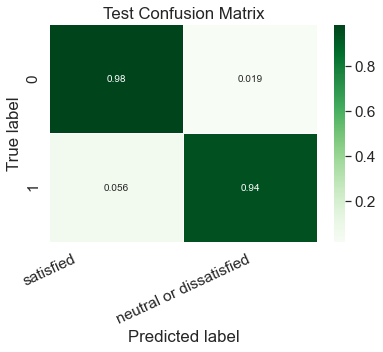

In [179]:
show_confusion_matrix_for_algorithem(y_train,predict_train, 'Neural Nets', 'Test')

#### Tain Evaluation



Neural Nets - Simble confusion matrix: 
[[14205   368]
 [  686 10717]]


              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     14573
         1.0       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Neural Nets - Model Accuracy is:  0.9594240837696335


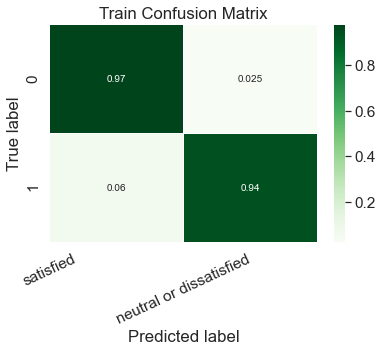

In [180]:
show_confusion_matrix_for_algorithem(y_test,predict_test, 'Neural Nets', 'Train')

## 2- Random Forest Classification Algorithm

In [181]:
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForestClassifier Classifier
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)

#Train the model using the training sets
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

### Make Prediction

In [182]:
y_pred_rf = classifier_rf.predict(x_test)
y_train_rf = classifier_rf.predict(x_train)

### Evaluate Model

#### Test Evaluation



Random Forest - Simble confusion matrix: 
[[14272   301]
 [  652 10751]]


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14573
         1.0       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Random Forest - Model Accuracy is:  0.9633122882660918


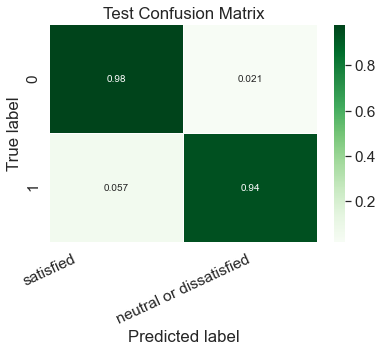

In [183]:
show_confusion_matrix_for_algorithem(y_test,y_pred_rf, 'Random Forest',  'Test')

#### Train Evaluation



Random Forest - Simble confusion matrix: 
[[58879     0]
 [    0 45025]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58879
         1.0       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



Random Forest - Model Accuracy is:  1.0


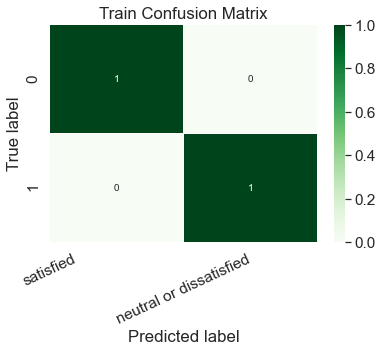

In [184]:
show_confusion_matrix_for_algorithem(y_train,y_train_rf, 'Random Forest', 'Train')

## 3- Support Vector Machines Classification Algorithm

In [185]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
classifier_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
classifier_svm.fit(x_train, y_train)

SVC(kernel='linear')

### Make Prediction

In [186]:
y_pred_svm = classifier_svm.predict(x_test)
y_train_svm = classifier_svm.predict(x_train)

### Evaluate Model

#### Test Evaluation



Support Vector Machines - Simble confusion matrix: 
[[13269  1304]
 [ 1972  9431]]


              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     14573
         1.0       0.88      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



Support Vector Machines - Model Accuracy is:  0.8738835848475516


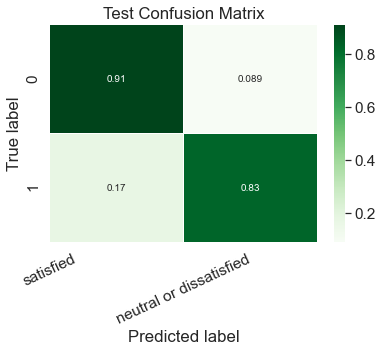

In [187]:
show_confusion_matrix_for_algorithem(y_test,y_pred_svm, 'Support Vector Machines',  'Test')

#### Train Evaluation



Support Vector Machines - Simble confusion matrix: 
[[53782  5097]
 [ 7735 37290]]


              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     58879
         1.0       0.88      0.83      0.85     45025

    accuracy                           0.88    103904
   macro avg       0.88      0.87      0.87    103904
weighted avg       0.88      0.88      0.88    103904



Support Vector Machines - Model Accuracy is:  0.876501385894672


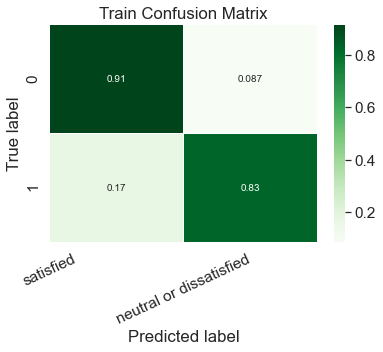

In [188]:
show_confusion_matrix_for_algorithem(y_train,y_train_svm, 'Support Vector Machines',  'Train')

## 4- Gaussian Naive Bayes Classification Algorithm

In [189]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_gnb = GaussianNB()

# Train the model using the training sets
model_gnb.fit(x_train,y_train)

GaussianNB()

### Make Prediction

In [190]:
y_test_gnb = model_gnb.predict(x_test)
y_train_gnb = model_gnb.predict(x_train)

### Evaluate Model

#### Test Evaluation



Gaussian Naive Bayes - Simble confusion matrix: 
[[13036  1537]
 [ 2049  9354]]


              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     14573
         1.0       0.86      0.82      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



Gaussian Naive Bayes - Model Accuracy is:  0.8619494918386202


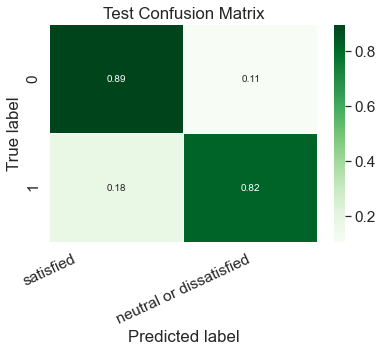

In [191]:
show_confusion_matrix_for_algorithem(y_test,y_test_gnb, 'Gaussian Naive Bayes', 'Test')

#### Train Evaluation



Gaussian Naive Bayes - Simble confusion matrix: 
[[52961  5918]
 [ 8076 36949]]


              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     58879
         1.0       0.86      0.82      0.84     45025

    accuracy                           0.87    103904
   macro avg       0.86      0.86      0.86    103904
weighted avg       0.87      0.87      0.86    103904



Gaussian Naive Bayes - Model Accuracy is:  0.8653179858330767


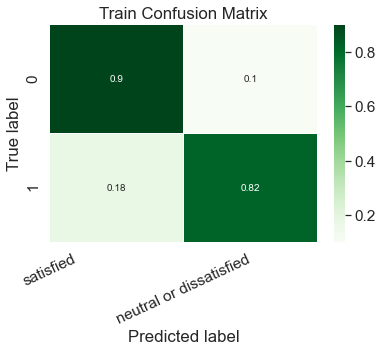

In [192]:
show_confusion_matrix_for_algorithem(y_train,y_train_gnb, 'Gaussian Naive Bayes', 'Train')

***

    In this clause we choose 4 Classification Algorithms to help us to predict the satisfaction problem in the best way.
    The Algorithms we choose:
    
    1- Neural Nets Classification Algorithm
    
    2- Random Forest Classification Algorithm (a model based trees)
    
    3- Support Vector Machines Classification Algorithm
    
    4- Gaussian Naive Bayes Classification Algorithm (a model that wasn't teached)
    
    By looking at the accuracy for each algorithm we can coclude that Neural Nets and Random Forest did the job very good, and the other two were not as good as the formers in this case
    
        Neural Nets - Model Accuracy is:  0.9672197412996613

        Random Forest - Model Accuracy is:  0.9633122882660918

        Support Vector Machines - Model Accuracy is:  0.8738835848475516

        Gaussian Naive Bayes - Model Accuracy is:  0.8619494918386202
        
    Then we can say that Neural Nets and Random Forest algorithems are better choices to use for predicting the satisfaction problem.


***

# Clause 6  (Regression)

## Part a.

#### Process Data for Clause 6 part a

In [193]:
def process_data_6(df, with_labeled_features):

    # Calculate new column with median of choosen columns
    col = df.loc[: , "Leg room service":"Cleanliness"]
    df['New Satisfaction Label'] = col.mean(axis=1)

    if with_labeled_features != 'true':
        # Drop already calculated columns
        df = df.drop('Leg room service', axis=1)
        df = df.drop('Baggage handling', axis=1)
        df = df.drop('Checkin service', axis=1)
        df = df.drop('Inflight service', axis=1)
        df = df.drop('Cleanliness', axis=1) 
    
    # Clean data frame
    df = process_data(df)
    
    return df
   
train_6_a = train_full
test_6_a = test_full

train_6_a = process_data_6(train_6_a, 'false')
test_6_a = process_data_6(test_6_a, 'false')

In [194]:
# convert train type from pandas.core.frame.DataFrame to numpy.array
train_np_arr_6 = train_6_a.to_numpy()

# split into input (X) and output (y) variables
x_train_6 = train_np_arr_6[:,0:18]
y_train_6 = train_np_arr_6[:,18]

test_np_arr_6 = test_6_a.to_numpy()

x_test_6 = test_np_arr_6[:,0:18]
y_test_6 = test_np_arr_6[:,18]


x_train_6 = x_train_6.astype('float')
y_train_6 = y_train_6.astype('float')

x_test_6 = x_test_6.astype('float')
y_test_6 = y_test_6.astype('float')

In [195]:
n_features = x_train_6.shape[1]

## Part b.

#### Evaluating the Algorithm

In [196]:
from sklearn import metrics

def evaluate_regression_algorithem(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Coefficient of Determination (R Squared):', metrics.r2_score(y_test, y_pred))

### 1- Neural Nets Regression Algorithm

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error

In [198]:
# define the keras model
model_nn_r = Sequential()
model_nn_r.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model_nn_r.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_nn_r.add(Dense(1, activation='linear'))

In [199]:
# compile the keras model
model_nn_r.compile(loss='mse', optimizer='adam')

In [ ]:
# fit the keras model on the dataset
model_nn_r.fit(x_train_6, y_train_6, epochs=150, batch_size=32, verbose=2)

In [201]:
# evaluate on test set
y_pred_nn = model_nn_r.predict(x_test_6)

In [202]:
evaluate_regression_algorithem(y_test_6, y_pred_nn)

Mean Absolute Error: 0.3707607779533708
Mean Squared Error: 0.23494841847881343
Coefficient of Determination (R Squared): 0.6189509100354242


### 2- Decision Tree Regression Algorithm

In [203]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_6, y_train_6)

DecisionTreeRegressor()

In [204]:
y_pred_dt = regressor.predict(x_test_6)

In [205]:
evaluate_regression_algorithem(y_test_6, y_pred_dt)

Mean Absolute Error: 0.4784493378503234
Mean Squared Error: 0.39787034185401904
Coefficient of Determination (R Squared): 0.35471737724831753


## Part c.

#### Process Data for Clause 6 part c

In [206]:
train_6_c = train_full
test_6_c = test_full

train_6_c = process_data_6(train_6_c, 'true')
test_6_c = process_data_6(test_6_c, 'true')

In [207]:
# convert train type from pandas.core.frame.DataFrame to numpy.array
train_np_arr_6_c = train_6_c.to_numpy()

# split into input (X) and output (y) variables
x_train_6_c = train_np_arr_6_c[:,0:23]
y_train_6_c = train_np_arr_6_c[:,23]

test_np_arr_6_c = test_6_c.to_numpy()

x_test_6_c = test_np_arr_6_c[:,0:23]
y_test_6_c = test_np_arr_6_c[:,23]



x_train_6_c = x_train_6_c.astype('float')
y_train_6_c = y_train_6_c.astype('float')

x_test_6_c = x_test_6_c.astype('float')
y_test_6_c = y_test_6_c.astype('float')

In [208]:
n_features_c = x_train_6_c.shape[1]

### 1- Neural Nets Regression Algorithm (with features)

In [ ]:
# define the keras model
model_nn_r_c = Sequential()
model_nn_r_c.add(Dense(20, input_dim=n_features_c, activation='relu', kernel_initializer='he_normal'))
model_nn_r_c.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_nn_r_c.add(Dense(1, activation='linear'))

# compile the keras model
model_nn_r_c.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model_nn_r_c.fit(x_train_6_c, y_train_6_c, epochs=150, batch_size=32, verbose=2)

# evaluate on test set
y_pred_nn_c = model_nn_r_c.predict(x_test_6_c)

evaluate_regression_algorithem(y_test_6_c, y_pred_nn_c)

### 2- Decision Tree Regression Algorithm (with features)

In [210]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train_6_c, y_train_6_c)

y_pred_dt_c = regressor.predict(x_test_6_c)

evaluate_regression_algorithem(y_test_6_c, y_pred_dt_c)

Mean Absolute Error: 0.0021866338158406003
Mean Squared Error: 0.0004835232522328307
Coefficient of Determination (R Squared): 0.9992158019345994


#### Features Importance for Decision Tree Model

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.00004
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00004
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00600
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.16521
Feature: 16, Score: 0.09065
Feature: 17, Score: 0.16514
Feature: 18, Score: 0.44209
Feature: 19, Score: 0.13041
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00001


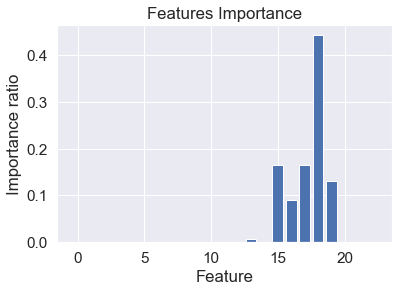

In [211]:
from matplotlib import pyplot

importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.title("Features Importance")
pyplot.ylabel("Importance ratio")
pyplot.xlabel("Feature")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

************
    
    In This Clause, we choose two different Regression based Algorithms:

    1- Neural Nets Regression Algorithm

    2- Decision Tree Regression Algorithm

    The features that was chosen for building the new Label are ('Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness' in numbers [15-19]), the new Label called 'New Satisfaction Label'.

    For every Algorithm we ran it twice, first without the 5 features above, the second was with.

    For every run we extracted usesful Regression metrics of the model run:

    1- Mean Absolute Error (MAE output is non-negative floating point. The best value is 0.0.)

    2- Mean Squared Error (A non-negative floating point value (the best value is 0.0))

    3- Coefficient of Determination (R Squared) (Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.)

    Conclusion:

    1- From metrics above, we can understand that the models with the 5 features yield better results, more accurate and less errors:

        Metrics with the 5 features -
        
            Neural Nets Metrics: 
                Mean Absolute Error: 0.0003747727298574977 (closer to the best value 0.0)
                Mean Squared Error: 1.9950600981278025e-06 (closer to the best value 0.0)
                Coefficient of Determination (R Squared): 0.9999967643287845 (closer to the best value 1.0)

            Decision Tree Metrics: 
                Mean Absolute Error: 0.0021866338158406003 (closer to the best value 0.0)
                Mean Squared Error: 0.0004835232522328307 (closer to the best value 0.0)
                Coefficient of Determination (R Squared): 0.9992158019345994 (closer to the best value 1.0)
                

        Metrics without the 5 features - 
        
            Neural Nets Metrics: 
                Mean Absolute Error: 0.3707607779533708
                Mean Squared Error: 0.23494841847881343
                Coefficient of Determination (R Squared): 0.6189509100354242
                
            Decision Tree Metrics: 
                Mean Absolute Error: 0.4784493378503234
                Mean Squared Error: 0.39787034185401904
                Coefficient of Determination (R Squared): 0.35471737724831753
        
    2- From the graph above (Features Importance for Decision Tree Model), we can conclude that the 5 features are so important for the model, and as we can see that the model depended on those 5 the most to train and predict, and they are important by far from other features and we can see that in the numbers and the graph(e.g Feature: 18, Score: 0.44208 but Feature: 20, Score: 0.00002)
    
    3- In both algorithms we get good results relatively, but we can see that Neural Nets was better a bit in most of the metrics from Decision Tree. like:
    
        Neural Nets Metrics: 
            Mean Absolute Error: 0.3789753679522265 (closer to the best value 0.0)
            Mean Squared Error: 0.23395989420562746 (closer to the best value 0.0)
            Coefficient of Determination (R Squared): 0.6205541397023624 (closer to the best value 1.0)

        Decision Tree Metrics: 
            Mean Absolute Error: 0.477871881736988
            Mean Squared Error: 0.39561441330458885
            Coefficient of Determination (R Squared): 0.3583761357381645



************